<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%203/Distribucion_de_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!['Logo FIUNA'](http://www.ing.una.py/images/logo-horizontal.png)
# PROBABILIDAD Y ESTADÍSTICA
---

## Semana 3 - Distribuciones de probabilidad
### Distribución de Poisson

### Materiales y recursos
##### Teoría
* [Distribución de Poisson](https://drive.google.com/file/d/1l1GnSW3wD3dtmPajYCSCw_sqYnuKUfVl/view?ts=5f0faec8)

### Actividades de laboratorio
* [Vídeos de ejercicios de distribución de Poisson resueltos (en excel)](https://www.youtube.com/playlist?list=PLtwTdZpdrv8i7jpvTC64lEpFycvSq-_ed)
* [Archivos distribución de Poisson](https://eaula.ing.una.py/mod/folder/view.php?id=27090)

### Importar módulos necesarios
* En esta sección, estaremos usando el módulo [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), el cual nos provee la clase `poisson` , para la resolución de problemas de distribución de probabilidades de Poisson.
* Complementariamente usaremos el módulo matplotlib.pyplot para realizar todos los gráficos que necesitemos.

In [1]:
from scipy.stats import poisson   # De esta manera importamos solamente la clase deseada y no todo el módulo scipy.stats
import matplotlib.pyplot as plt   # Importamos el módulo matplotlib.pyplot y le asignamos el alias de "plt" por conveniencia a la hora de trabajar con el mismo

# Distribución de Poisson
Recordemos que la distribución de probabilidades de Poisson está dada por la fórmula:
> $p(x) = \frac{e^{-\lambda }\lambda ^{x}}{x!}$

donde:
* $p(x)$: es la probabilidad de ocurrencia de un suceso, cuando la variable discreta toma un valor finito x.
* $\lambda $ (lambda): es la media de ocurrencia en el segmento dado.
* $x$: el número de éxitos por unidad.

# Ejercicios de distribución de probabilidades de Poisson.
1. Carlos ha notado que cada minuto que pasa, hay una probabilidad de 1/720 de que  la  página  en  Facebook  de  su  negocio  obtenga  un  “me  gusta”, independientemente de lo que suceda en cualquier otro minuto.
> (a).  ¿Cuántos “me gusta” espera recibir Carlos durante un periodo de 24 horas? (b). ¿Cuál es la probabilidad de que Carlos reciba más de 2 “me gusta” en las próximas 12 horas? (c). ¿Cuál es la probabilidad de que Carlos reciba 3 o 4 “me gusta” en las próximas 12 horas?

In [2]:
# Definimos las variables que vamos a necesitar
prob_exito = 1/720
prob_fracaso = 1 - prob_exito
n = 24*60 # 24 horas expresadas en minutos
# En python "lambda" es una palabra reservada por lo que para resolver los ejercicios estaremos usando la variable L
L = n * prob_exito

(a). ¿Cuántos “me gusta” espera recibir Carlos durante un periodo de 24 horas?. En un periodo de 24 horas se espera recibir L me gustas.

In [3]:
# Imprimimos el resultado
print('En un periodo de 24 horas, Carlos espera recibir:', int(L), '"me gusta"')

En un periodo de 24 horas, Carlos espera recibir: 2 "me gusta"


(b). ¿Cuál es la probabilidad de que Carlos reciba más de 2 “me gusta” en las próximas 12 horas?. Para este caso, debemos modificar `n` y por lo tanto `L` y aplicar el método `sf(x)` _survival function_ a un objeto del tipo `poisson`. La función `sf(x)` es lo mismo que $1-cdf(x)$ donde `cdf(x)` es la probabilidad acumulada de x.

In [4]:
# Volvemos a asignar las variables n y L
n = 12*60 # 12 horas expresadas en minutos
L = n * prob_exito # Para actualizar el valor de L, debemos volver a ejecutar esta línea de código

# Creamos un objeto del tipo poisson al que llamaremos dist_poisson, y que contiene los datos del problema
dist_poisson = poisson(L)

In [5]:
# Aplicamos pmf(x) a dist_poisson
prob_mas_2_megusta = dist_poisson.sf(2)

# Imprimimos la respuesta
print('La probabilidad de que Carlos reciba más de 2 "me gusta" en 12 horas es:', prob_mas_2_megusta)

La probabilidad de que Carlos reciba más de 2 "me gusta" en 12 horas es: 0.08030139707139418


(c). ¿Cuál es la probabilidad de que Carlos reciba 3 o 4 “me gusta” en las próximas 12 horas?. Para esto tenemos dos opciones que deberían darnos el mismo resultado.
* Hallar p(3) y p(4), utilizando el método `pmf(x)`, y sumando ambos resultados
* Hallar p(4) acumulado y p(2) acumulado, usando el método `cdf(x)`, y restando ambos resultados

In [7]:
# Utilicemos el primer método
prob_3MG = dist_poisson.pmf(3)
prob_4MG = dist_poisson.pmf(4)

# La probabilidad de 3 o 4 "me gusta" está dada por la suma de p(3) y p(4)
prob_3o4MG = prob_3MG + prob_4MG

# Imprimimos el resultado
print('La probabilidad de que carlos reciba 3 o 4 "me gusta" en las próximas 12 horas es:', prob_3o4MG)

La probabilidad de que carlos reciba 3 o 4 "me gusta" en las próximas 12 horas es: 0.07664155024405049


In [8]:
# Resolvemos ahora por el segundo método
prob_4MG_acum = dist_poisson.cdf(4)
prob_2MG_acum = dist_poisson.cdf(2)

# La probabilidad de 3 o 4 "me gusta" está dada por la diferencia de p_acum(4) y p_acum(2)
prob_3o4MG = prob_4MG_acum - prob_2MG_acum

# Imprimimos el resultado
print('La probabilidad de que carlos reciba 3 o 4 "me gusta" en las próximas 12 horas es:', prob_3o4MG)

La probabilidad de que carlos reciba 3 o 4 "me gusta" en las próximas 12 horas es: 0.0766415502440505


De lo anterior se comprueba que ambos métodos arrojan el mismo resultado. Que era lo esperado
# Opcional
De manera a ver el potencial que nos ofrece el módulo `scipy.stats` vemos los siguientes ejemplos:

In [11]:
# Por ejemplo, haciendo uso de las variables de la pregunta (a)
prob_exito = 1/720
prob_fracaso = 1 - prob_exito
n = 24*60 # 24 horas expresadas en minutos
# En python "lambda" es una palabra reservada por lo que para resolver los ejercicios estaremos usando la variable L
L = n * prob_exito

# Podemos hallar los valores que describen nuestra distribución, por medio del método stats
media, var, sesgo, curt = poisson.stats(L, moments='mvsk')
print('Media:', media)
print('Varianza:', var)
print('Sesgo:', sesgo)
print('Curtosis:', curt)

Media: 2.0
Varianza: 2.0
Sesgo: 0.7071067811865476
Curtosis: 0.5


In [16]:
# Usando los valores de la pregunta (b) y (c):
n = 12*60 # 12 horas expresadas en minutos
L = n * prob_exito # Para actualizar el valor de L, debemos volver a ejecutar esta línea de código

# Creamos un objeto del tipo poisson al que llamaremos dist_poisson, y que contiene los datos del problema
dist_poisson = poisson(L)

# Podriamos calcular, en un solo paso, la distribución de probabilidades para obtener 0, 1, 2, 3, 4... 20 "me gusta" en un intervalo de 12 horas
# Definamos los valores de x
x = range(21) # crea un objeto iterable de 0 a 20
p = dist_poisson.pmf(x) # calcula la distribución de probabilidades para cada valor de x dado

# Imprimimos el vector p
print(p)

[3.67879441e-01 3.67879441e-01 1.83939721e-01 6.13132402e-02
 1.53283100e-02 3.06566201e-03 5.10943668e-04 7.29919526e-05
 9.12399408e-06 1.01377712e-06 1.01377712e-07 9.21615563e-09
 7.68012969e-10 5.90779207e-11 4.21985148e-12 2.81323432e-13
 1.75827145e-14 1.03427732e-15 5.74598513e-17 3.02420270e-18
 1.51210135e-19]


Podríamos aprovechar lo anterior para graficar la distribución de probabilidades de Poisson, comparando los resultados para diferentes intervalos de tiempo. Usemos 24 horas y 12 horas, como en las preguntas (a) y (b) de manera a entender como esto afecta a las probabilidades.

In [25]:
# Hallemos p(x) para los datos en (a). Siendo x = [0, 1, 2, 3, ... 20]
# Como anteriormente definimos x, no necesitamos volver a hacerlo, ya que los valores asignados son los mismos
n = 24*60 # 24 horas expresadas en minutos
L = n * prob_exito # Para actualizar el valor de L, debemos volver a ejecutar esta línea de código

# Otra forma de caldular la probabilidad sin definir antes un objeto del tipo Poisson
p24 = poisson.pmf(x, L) 

# Imprimimos p24(x)
print(p24)

[1.35335283e-01 2.70670566e-01 2.70670566e-01 1.80447044e-01
 9.02235222e-02 3.60894089e-02 1.20298030e-02 3.43708656e-03
 8.59271640e-04 1.90949253e-04 3.81898506e-05 6.94360921e-06
 1.15726820e-06 1.78041262e-07 2.54344660e-08 3.39126213e-09
 4.23907766e-10 4.98715019e-11 5.54127799e-12 5.83292420e-13
 5.83292420e-14]


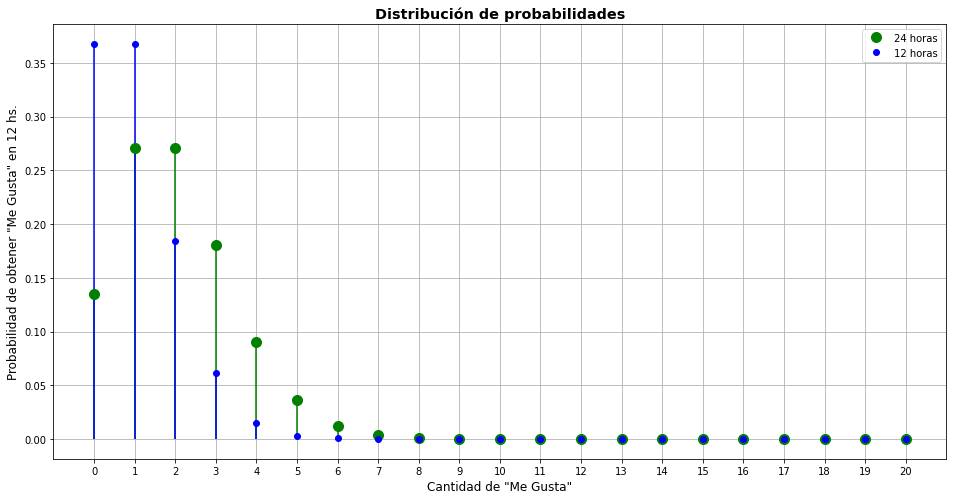

In [34]:
# Finalmente podemos graficar la función haciendo uso del módulo matplotlib.plotlib, al que llamamos con el alias de plt
fig, ax = plt.subplots(1, 1, figsize= (16,8)) # Creamos un lienzo para nuestro gráfico

# El gráfico está dado por:

# Distribución de probabilidades para 24 hs.
ax.plot(x, p24, 'go', ms= 10, label= '24 horas') # Agregamos nuestro gráfico en forma de puntos verdes con el comando 'go' -> g: green (verde)- o: puntos, ms determina el tamaño del punto, que lo hacemos más grande para que sea visible
ax.vlines(x= x, ymin= 0, ymax= p24, colors='g') # Agregamos las líneas verticales desde ymin= 0 hasta ymax = p(x), de color verde
# Distribución de probabilidades para 12 hs.
ax.plot(x, p, 'bo', label= '12 horas') # Agregamos nuestro gráfico en forma de puntos azules con el comando 'bo' -> b: blue (azul)- o: puntos
ax.vlines(x= x, ymin= 0, ymax= p, colors='b') # Agregamos las líneas verticales desde ymin= 0 hasta ymax = p(x), de color azul

# Los demás complementos, opcionales:
ax.grid() # Agrega las grillas al gráfico
plt.xticks(x) # Modifica los puntos representados en el eje x, y la grilla para que coincidan exactamente a intervalos enteros
ax.set_title('Distribución de probabilidades', fontsize='x-large', fontweight= 'bold')
ax.set_xlabel('Cantidad de "Me Gusta"', fontsize='large')
ax.set_ylabel('Probabilidad de obtener "Me Gusta" en 12 hs.', fontsize='large')
ax.legend(loc= 'best')
plt.show()

Del gráfico, resulta muy interesante observar lo siguiente:
1. La probabilidad de recibir 0 o 1 "me gusta" es menor en un periodo de 24 horas que en uno de 12 horas. Si analizamos, esto nos resulta bastante intuitivo, ya que en un mayor periodo de tiempo sería menos probable que nadie o solo una persona le de "me gusta" a la página.
2. Por otro lado, la probabilidad de recibir 2, 3, 4, 5, 6 y 7 "me gusta" es mayor en un perdiodo de 24 horas que en uno de 12 horas. 